In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [3]:
df = pd.read_csv('train (1).csv', usecols = ["MSSubClass", "MSZoning", "LotFrontage", "LotArea", "Street", "LotShape", "1stFlrSF", "2ndFlrSF", "YearBuilt", "SalePrice"])

In [4]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,YearBuilt,1stFlrSF,2ndFlrSF,SalePrice
0,60,RL,65.0,8450,Pave,Reg,2003,856,854,208500
1,20,RL,80.0,9600,Pave,Reg,1976,1262,0,181500
2,60,RL,68.0,11250,Pave,IR1,2001,920,866,223500
3,70,RL,60.0,9550,Pave,IR1,1915,961,756,140000
4,60,RL,84.0,14260,Pave,IR1,2000,1145,1053,250000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSSubClass   1460 non-null   int64  
 1   MSZoning     1460 non-null   object 
 2   LotFrontage  1201 non-null   float64
 3   LotArea      1460 non-null   int64  
 4   Street       1460 non-null   object 
 5   LotShape     1460 non-null   object 
 6   YearBuilt    1460 non-null   int64  
 7   1stFlrSF     1460 non-null   int64  
 8   2ndFlrSF     1460 non-null   int64  
 9   SalePrice    1460 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 114.2+ KB


In [6]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSSubClass   1460 non-null   int64  
 1   MSZoning     1460 non-null   object 
 2   LotFrontage  1460 non-null   float64
 3   LotArea      1460 non-null   int64  
 4   Street       1460 non-null   object 
 5   LotShape     1460 non-null   object 
 6   YearBuilt    1460 non-null   int64  
 7   1stFlrSF     1460 non-null   int64  
 8   2ndFlrSF     1460 non-null   int64  
 9   SalePrice    1460 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 114.2+ KB


In [8]:
import datetime

In [9]:
df['HouseAge'] = datetime.datetime.now().year - df['YearBuilt']

In [10]:
df.drop('YearBuilt', axis = 1, inplace = True)

In [11]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,1stFlrSF,2ndFlrSF,SalePrice,HouseAge
0,60,RL,65.0,8450,Pave,Reg,856,854,208500,17
1,20,RL,80.0,9600,Pave,Reg,1262,0,181500,44
2,60,RL,68.0,11250,Pave,IR1,920,866,223500,19
3,70,RL,60.0,9550,Pave,IR1,961,756,140000,105
4,60,RL,84.0,14260,Pave,IR1,1145,1053,250000,20


In [12]:
for i in df.columns:
    print(f'columns: {i}--------> unique_values: {df[i].nunique()}')

columns: MSSubClass--------> unique_values: 15
columns: MSZoning--------> unique_values: 5
columns: LotFrontage--------> unique_values: 111
columns: LotArea--------> unique_values: 1073
columns: Street--------> unique_values: 2
columns: LotShape--------> unique_values: 4
columns: 1stFlrSF--------> unique_values: 753
columns: 2ndFlrSF--------> unique_values: 417
columns: SalePrice--------> unique_values: 663
columns: HouseAge--------> unique_values: 112


In [13]:
category_columns = ['MSSubClass','MSZoning', 'Street', 'LotShape']
y = ['SalePrice']

In [14]:
continueous_columns = []
for i in df.columns:
    if i in category_columns:
        pass
    elif i in y:
        pass
    else:
        continueous_columns.append(i)

In [15]:
continueous_columns

['LotFrontage', 'LotArea', '1stFlrSF', '2ndFlrSF', 'HouseAge']

In [16]:
for i in category_columns:
    df[i] = df[i].astype('category')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   MSSubClass   1460 non-null   category
 1   MSZoning     1460 non-null   category
 2   LotFrontage  1460 non-null   float64 
 3   LotArea      1460 non-null   int64   
 4   Street       1460 non-null   category
 5   LotShape     1460 non-null   category
 6   1stFlrSF     1460 non-null   int64   
 7   2ndFlrSF     1460 non-null   int64   
 8   SalePrice    1460 non-null   int64   
 9   HouseAge     1460 non-null   int64   
dtypes: category(4), float64(1), int64(5)
memory usage: 75.5 KB


In [18]:
for i in category_columns:
    print(df[i].cat.codes)
    print(df[i].cat.categories)
    print(df[i].cat.codes.values)
    print('\n')

0       5
1       0
2       5
3       6
4       5
       ..
1455    5
1456    0
1457    6
1458    0
1459    0
Length: 1460, dtype: int8
Int64Index([20, 30, 40, 45, 50, 60, 70, 75, 80, 85, 90, 120, 160, 180, 190], dtype='int64')
[5 0 5 ... 6 0 0]


0       3
1       3
2       3
3       3
4       3
       ..
1455    3
1456    3
1457    3
1458    3
1459    3
Length: 1460, dtype: int8
Index(['C (all)', 'FV', 'RH', 'RL', 'RM'], dtype='object')
[3 3 3 ... 3 3 3]


0       1
1       1
2       1
3       1
4       1
       ..
1455    1
1456    1
1457    1
1458    1
1459    1
Length: 1460, dtype: int8
Index(['Grvl', 'Pave'], dtype='object')
[1 1 1 ... 1 1 1]


0       3
1       3
2       0
3       0
4       0
       ..
1455    3
1456    3
1457    3
1458    3
1459    3
Length: 1460, dtype: int8
Index(['IR1', 'IR2', 'IR3', 'Reg'], dtype='object')
[3 3 0 ... 3 3 3]




In [19]:
import numpy as np

In [20]:
category_features = torch.tensor(np.stack([df[i].cat.codes.values for i in category_columns], axis = 1), dtype = torch.int64)

In [21]:
category_features

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [22]:
continueous_features = torch.tensor(np.stack([df[i].values for i in continueous_columns], axis = 1), dtype = torch.float)

In [23]:
continueous_features

tensor([[   65.,  8450.,   856.,   854.,    17.],
        [   80.,  9600.,  1262.,     0.,    44.],
        [   68., 11250.,   920.,   866.,    19.],
        ...,
        [   66.,  9042.,  1188.,  1152.,    79.],
        [   68.,  9717.,  1078.,     0.,    70.],
        [   75.,  9937.,  1256.,     0.,    55.]])

In [24]:
y = torch.tensor(df[y].values, dtype = torch.float)

In [25]:
y

tensor([[208500.],
        [181500.],
        [223500.],
        ...,
        [266500.],
        [142125.],
        [147500.]])

In [26]:
print(category_features.shape, continueous_features.shape, y.shape)

torch.Size([1460, 4]) torch.Size([1460, 5]) torch.Size([1460, 1])


In [27]:
category_size = [df[i].cat.categories.nunique() for i in category_columns]

In [28]:
embedding_size = [(size, min(50, (size+1)//2)) for size in category_size]

In [29]:
embedding_size

[(15, 8), (5, 3), (2, 1), (4, 2)]

In [30]:
class TabularModel(nn.Module):
    def __init__(self,embedding_size, n_cont, out_sz, hidden_layers, p=0.5):
        
        super().__init__()
        self.embedding_list = nn.ModuleList([nn.Embedding(i,o) for i,o in embedding_size])
        self.embedding_drop = nn.Dropout(p)
        
        #normalize the continueous feature:
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        #inputs
        n_emb = sum(o for i,o in embedding_size)
        total_inputs = n_emb + n_cont
        
        #creating layers:
        layerlist = []
        
        for i in hidden_layers:
            layerlist.append(nn.Linear(total_inputs, i))
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            total_inputs = i
        layerlist.append(nn.Linear(hidden_layers[-1], out_sz))
        self.hidden_layers = nn.Sequential(*layerlist)
        
    def forward(self,x_cat, x_cont):
        embeddings = []
        
        for i,e in enumerate(self.embedding_list):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, axis = 1)
        x = self.embedding_drop(x)
        
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x,x_cont], axis = 1)
        x = self.hidden_layers(x)
        
        return x

In [31]:
torch.manual_seed(50)
my_model = TabularModel(embedding_size, continueous_features.shape[1], 1, [100,50], p=0.4)

In [32]:
my_model

TabularModel(
  (embedding_list): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (embedding_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (hidden_layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)

In [33]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(my_model.parameters(), lr = 0.01)

In [34]:
df.shape

(1460, 10)

In [35]:
batch_size = 1460
test_size = int(batch_size * .2)

cat_train = category_features[:batch_size-test_size]
cat_test = category_features[batch_size-test_size:batch_size]
con_train = continueous_features[:batch_size-test_size]
con_test = continueous_features[batch_size-test_size:batch_size]
y_train = y[:batch_size-test_size]
y_test = y[batch_size-test_size:batch_size]

In [36]:
import time 
start_time = time.time()

epochs = 4800
losses = []

for i in range(epochs):
    i+=1
    y_pred = my_model(cat_train, con_train)
    loss = torch.sqrt(criterion(y_pred, y_train))
    losses.append(loss)
    
    if i%200 == 1:
        print(f'epoch: {i:3}  loss: {loss.item():10.8f}')
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
print(f'epochs: {i} loss: {loss.item()}')
print(f'\n Duration: {time.time() - start_time}')

epoch:   1  loss: 197026.60937500
epoch: 201  loss: 196421.48437500
epoch: 401  loss: 194379.21875000
epoch: 601  loss: 191107.73437500
epoch: 801  loss: 186708.75000000
epoch: 1001  loss: 181362.31250000
epoch: 1201  loss: 174674.67187500
epoch: 1401  loss: 167369.17187500
epoch: 1601  loss: 159738.65625000
epoch: 1801  loss: 150960.50000000
epoch: 2001  loss: 141595.25000000
epoch: 2201  loss: 132218.84375000
epoch: 2401  loss: 122553.17968750
epoch: 2601  loss: 112659.25000000
epoch: 2801  loss: 104566.23437500
epoch: 3001  loss: 94609.71093750
epoch: 3201  loss: 86133.01562500
epoch: 3401  loss: 74837.25781250
epoch: 3601  loss: 64692.54296875
epoch: 3801  loss: 56496.65625000
epoch: 4001  loss: 48742.10937500
epoch: 4201  loss: 43700.68750000
epoch: 4401  loss: 39054.92187500
epoch: 4601  loss: 37095.03125000
epochs: 4800 loss: 35695.42578125

 Duration: 297.2482557296753


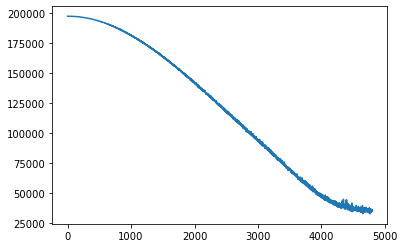

In [37]:
plt.plot(range(epochs),losses)

In [38]:
with torch.no_grad():
    y_eval = my_model(cat_test,con_test)
    loss = torch.sqrt(criterion(y_eval, y_test))

In [39]:
print(loss)

tensor(43675.7773)


In [40]:
print(f'{"PREDICTED":>12} {"ACTUAL":>8} {"DIFF":>8}')
for i in range(50):
    diff = np.abs(y_eval[i].item()-y_test[i].item())
    print(f'{i+1:2}. {y_eval[i].item():8.4f} {y_test[i].item():8.4f} {diff:8.4f}')

   PREDICTED   ACTUAL     DIFF
 1. 196881.0312 235000.0000 38118.9688
 2. 486820.5000 625000.0000 138179.5000
 3. 164579.0469 171000.0000 6420.9531
 4. 124699.8203 163000.0000 38300.1797
 5. 118261.4453 171900.0000 53638.5547
 6. 264492.8438 200500.0000 63992.8438
 7. 236983.1719 239000.0000 2016.8281
 8. 206393.0625 285000.0000 78606.9375
 9. 108379.1484 119500.0000 11120.8516
10. 115142.6641 115000.0000 142.6641
11. 91253.2891 154900.0000 63646.7109
12. 107880.3984 93000.0000 14880.3984
13. 195453.9219 250000.0000 54546.0781
14. 229214.7500 392500.0000 163285.2500
15. 751683.5625 745000.0000 6683.5625
16. 83344.6953 120000.0000 36655.3047
17. 269380.7812 186700.0000 82680.7812
18. 101542.0000 104900.0000 3358.0000
19. 103785.0703 95000.0000 8785.0703
20. 203308.6406 262000.0000 58691.3594
21. 192074.7812 195000.0000 2925.2188
22. 182970.3281 189000.0000 6029.6719
23. 221509.7500 168000.0000 53509.7500
24. 180279.7656 174000.0000 6279.7656
25. 125895.6016 125000.0000 895.6016
26. 1723